In [1]:
import networkx as nx
import numpy as np
import pandas as pd 
import operator
import matplotlib.pyplot as plt

In [2]:
nx_graphs = []
agg_graph = nx.MultiGraph()
venue_df_list = []
for i in range(31):
	# with open(f'..\ATX_Networks\sim_day_{i+1}.gexf') as graph_file:
	nx_graphs.append(nx.read_gexf(f'..\ATX_Networks\sim_day_{i+1}.gexf'))
	venue_dict = nx.get_edge_attributes(nx_graphs[i], "venueid")
	venue_arr = list(venue_dict.items())
	rows = []
	for row in venue_arr:
		rows.append([row[0][0],row[0][1],row[1]])
	venue_df_list.append(pd.DataFrame(rows))



In [3]:
concat_venue_df = pd.concat(venue_df_list)
concat_venue_df.columns = ['source','target','venueid']
concat_venue_df.head()


,source,target,venueid
0,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,d531979041494d0d0d2387cfc611f6e70d91bcb92cf966...,440da2cbf964a52091301fe3
1,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,cf4e564f4c8e3aecc9dacafce90cada3eabaff58464e74...,440da2cbf964a52091301fe3
2,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,594a39e074fda9219102eff386f3da1944494aaa18c036...,440da2cbf964a52091301fe3
3,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,a1470e73f1bc4f7c757c49138afd84bd1ad09e9277526a...,440da2cbf964a52091301fe3
4,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,6f8848838f9afe5a7b38c23ad5018179f69e518ee721ba...,440da2cbf964a52091301fe3


In [4]:
places_df = pd.read_csv("../RVF_ATX_PID_HZ_Places_Lookup.tsv",delimiter='\t')
places_df.head()

,venueid,venuename,address,city,dma,state,country,geolat,geolong,catid,...,level1cat,level2catId,level2cat,level3catId,level3cat,chainid,chainname,parentvenueid,zip,sample
0,40b52f80f964a5204e001fe3,Room 710,710 Red River St,Austin,"Austin, TX",TX,US,30.268139,-97.736537,4bf58dd8d48988d1e9931735,...,Arts & Entertainment,4bf58dd8d48988d1e5931735,Music Venues,4bf58dd8d48988d1e9931735,Rock Clubs,NaN,NaN,NaN,78701,us_all
1,42accc80f964a5204e251fe3,Friends Bar,208 E 6th St,Austin,"Austin, TX",TX,US,30.267593,-97.741048,4bf58dd8d48988d116941735,...,Nightlife Spots,4bf58dd8d48988d116941735,Bars,NaN,NaN,NaN,NaN,NaN,78701,us_all
2,45e6ccabf964a52059431fe3,Club Primos,1700 E 6th St,Austin,"Austin, TX",TX,US,30.262650,-97.724159,4bf58dd8d48988d1e9931735,...,Arts & Entertainment,4bf58dd8d48988d1e5931735,Music Venues,4bf58dd8d48988d1e9931735,Rock Clubs,NaN,NaN,NaN,78702,us_all
3,49c92768f964a52036581fe3,Chipotle Mexican Grill,1700 W Parmer Ln,Austin,"Austin, TX",TX,US,30.412928,-97.687941,4bf58dd8d48988d1c1941735,...,Food,4bf58dd8d48988d1c1941735,Mexican Restaurants,NaN,NaN,556e0f6fa7c82e6b724f8c82,Chipotle Mexican Grill,NaN,78727,us_all
4,49ce8a46f964a520545a1fe3,Texadelphia,3706 Guadalupe St Ste B,Austin,"Austin, TX",TX,US,30.302455,-97.738485,4bf58dd8d48988d14e941735,...,Food,4bf58dd8d48988d14e941735,American Restaurants,NaN,NaN,NaN,NaN,NaN,78705,us_all


In [5]:
print(concat_venue_df.shape)
print(places_df.shape)
merged_df = concat_venue_df.merge(places_df, on='venueid')
print(merged_df.shape)
merged_df.head()

(230965, 3)
(101210, 22)
(230965, 24)


,source,target,venueid,venuename,address,city,dma,state,country,geolat,...,level1cat,level2catId,level2cat,level3catId,level3cat,chainid,chainname,parentvenueid,zip,sample
0,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,d531979041494d0d0d2387cfc611f6e70d91bcb92cf966...,440da2cbf964a52091301fe3,Austin Bergstrom International Airport (AUS),3600 Presidential Blvd,Austin,"Austin, TX",TX,US,30.202186,...,Travel & Transport,4bf58dd8d48988d1ed931735,Airports,NaN,NaN,NaN,NaN,NaN,78719,us_all
1,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,cf4e564f4c8e3aecc9dacafce90cada3eabaff58464e74...,440da2cbf964a52091301fe3,Austin Bergstrom International Airport (AUS),3600 Presidential Blvd,Austin,"Austin, TX",TX,US,30.202186,...,Travel & Transport,4bf58dd8d48988d1ed931735,Airports,NaN,NaN,NaN,NaN,NaN,78719,us_all
2,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,594a39e074fda9219102eff386f3da1944494aaa18c036...,440da2cbf964a52091301fe3,Austin Bergstrom International Airport (AUS),3600 Presidential Blvd,Austin,"Austin, TX",TX,US,30.202186,...,Travel & Transport,4bf58dd8d48988d1ed931735,Airports,NaN,NaN,NaN,NaN,NaN,78719,us_all
3,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,a1470e73f1bc4f7c757c49138afd84bd1ad09e9277526a...,440da2cbf964a52091301fe3,Austin Bergstrom International Airport (AUS),3600 Presidential Blvd,Austin,"Austin, TX",TX,US,30.202186,...,Travel & Transport,4bf58dd8d48988d1ed931735,Airports,NaN,NaN,NaN,NaN,NaN,78719,us_all
4,2adee8895bc53ddebe8fb9c8a532f8bb5105a0d5bdcfd7...,6f8848838f9afe5a7b38c23ad5018179f69e518ee721ba...,440da2cbf964a52091301fe3,Austin Bergstrom International Airport (AUS),3600 Presidential Blvd,Austin,"Austin, TX",TX,US,30.202186,...,Travel & Transport,4bf58dd8d48988d1ed931735,Airports,NaN,NaN,NaN,NaN,NaN,78719,us_all


# Finding the most popular venues

In [6]:
groups = merged_df.groupby(['venueid','venuename'])
venue_frequency_dict = groups.count()['source'].to_dict()
venue_frequency_sorted_list = sorted(venue_frequency_dict.items(),key=operator.itemgetter(1),reverse=True)
print(venue_frequency_sorted_list[:20])


[(('440da2cbf964a52091301fe3', 'Austin Bergstrom International Airport (AUS)'), 30899), (('45f2c1f7f964a520e4431fe3', 'The Domain'), 12579), (('4afaedfef964a520a11922e3', 'Buc-ee’s'), 3501), (('4f6220e2e4b0f9d4771e9a8d', "Buc-ee's"), 2679), (('4af625a2f964a520aa0122e3', "Marco's Pizza"), 2145), (('4bf1ce9399d02d7f5195c948', 'The University of Texas at Austin'), 1928), (('453c8566f964a520123c1fe3', 'Zilker Park'), 1913), (('4c0181a04f1ea59340aa6b7d', 'Lake Buchanan'), 1850), (('4b240c34f964a520e05f24e3', 'H-E-B plus!'), 1680), (('4bd4985e6f6495219db16dec', 'Lake Travis'), 1589), (('4bf7e9ab5317a5931cc0fe7e', 'Lake LBJ'), 1396), (('4b7c4e3df964a5201e8b2fe3', 'Walmart Supercenter'), 1360), (('582cea049dc8d03f6e9aba40', 'HEB plus!'), 1356), (('4b840bcdf964a520281d31e3', 'H-E-B plus!'), 1320), (('4b4e4982f964a5202ee826e3', 'H-E-B plus!'), 1309), (('4aabf756f964a5203d5b20e3', 'Samsung Austin Semiconductor'), 1305), (('4c9f869903133704af0273d5', 'H-E-B'), 1305), (('43ed0a2ff964a5204b2f1fe3', 

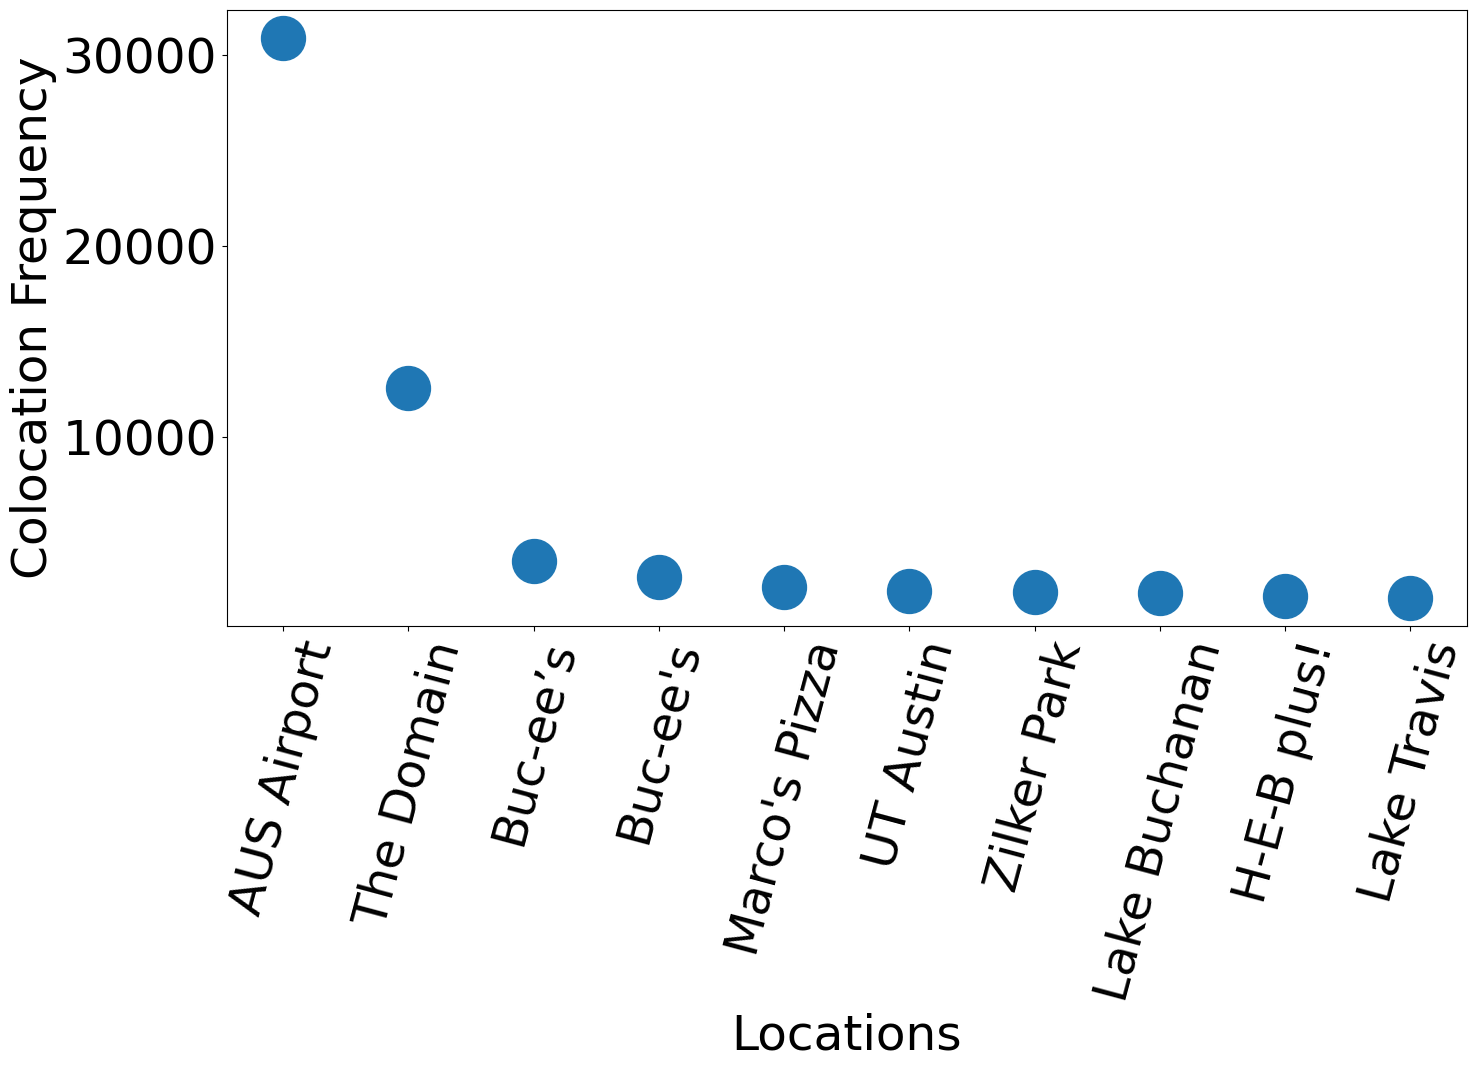

In [19]:
x = []
y = []
for tuple in venue_frequency_sorted_list:
    x.append(tuple[0][1])
    y.append(tuple[1])
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 35})
x[0]="AUS Airport"
x[5]="UT Austin"
plt.scatter(x[:10], y[:10], s=1000)
plt.xlabel("Locations", fontsize = 35)
plt.ylabel("Colocation Frequency", fontsize = 35)
plt.xticks(rotation=75)
plt.show()

# Loyalty

In [8]:
merged_switch_df = merged_df.copy().rename(columns={'source':'target','target':'source'})
shift_front = merged_switch_df['source']
merged_switch_df.drop(labels=['source'], axis=1,inplace = True)
merged_switch_df.insert(0, 'source', shift_front)
double_df = pd.concat([merged_df,merged_switch_df])
double_df.shape

(461930, 24)

In [9]:
unique_venue_customers_dict = double_df.groupby('venueid').nunique()['source'].to_dict()

In [10]:
loyalty_scores = []
for tuple in venue_frequency_dict.items():
    loyalty_scores.append((tuple,tuple[1]/unique_venue_customers_dict[tuple[0][0]]))
loyalty_scores = sorted(loyalty_scores, key=lambda x: x[0][1],reverse=True)

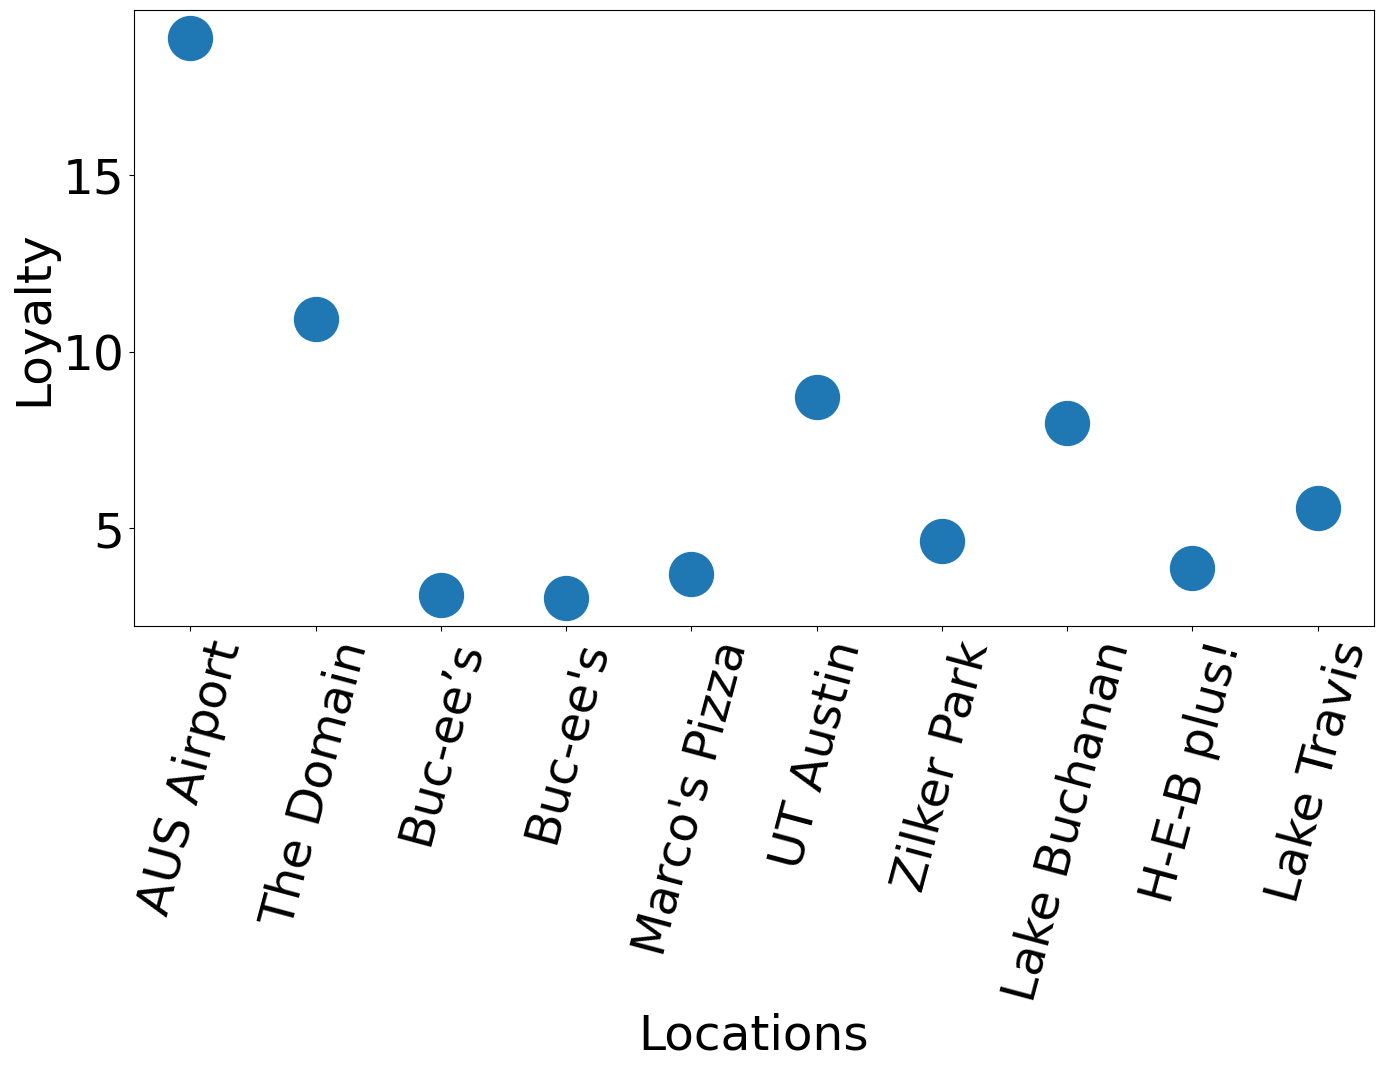

In [20]:
x_loyalty = []
y_loyalty = []
for tuple in loyalty_scores:
    x_loyalty.append(tuple[0][0][1])
    y_loyalty.append(tuple[1])
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 35})
x_loyalty[0]="AUS Airport"
x_loyalty[5]="UT Austin"
plt.scatter(x_loyalty[:10], y_loyalty[:10],s=1000)
plt.xlabel("Locations", fontsize = 35)
plt.ylabel("Loyalty", fontsize = 35)
plt.xticks(rotation=75)

plt.show()

In [12]:
#groupby source target, count by venueid, sort the (s,t) by the colocation count from high to low. 